# Task-3: IRIS FLOWER CLASSIFICATION

Author: Vivek Kumar
    
Batch: NOV BATCH P18
    
Domain: Data Science
    
Aim: To create a model that can classify iris flower into different species based on ther sepal and petal measurement.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("IRIS.csv")

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [5]:
df.shape

(150, 5)

In [6]:
df.species.value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [9]:
df_dup=df.duplicated().any()

In [10]:
df_dup

True

In [11]:
df=df.drop_duplicates()

In [12]:
df_dup=df.duplicated().any()

In [13]:
df_dup

False

In [14]:
cate_val=[]
cont_val=[]

for column in df.columns:
    if df[column].nunique()<=10:
        cate_val.append(column)
    else:
        cont_val.append(column)

In [15]:
cate_val

['species']

In [16]:
cont_val

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

In [17]:
df['species']

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: species, Length: 147, dtype: object

In [18]:
df.nunique()

sepal_length    35
sepal_width     23
petal_length    43
petal_width     22
species          3
dtype: int64

In [19]:
df['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [20]:
df.sepal_length.unique()

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.4, 4.8, 4.3, 5.8, 5.7, 5.2, 5.5,
       4.5, 5.3, 7. , 6.4, 6.9, 6.5, 6.3, 6.6, 5.9, 6. , 6.1, 5.6, 6.7,
       6.2, 6.8, 7.1, 7.6, 7.3, 7.2, 7.7, 7.4, 7.9])

In [21]:
df.sepal_width.unique()

array([3.5, 3. , 3.2, 3.1, 3.6, 3.9, 3.4, 2.9, 3.7, 4. , 4.4, 3.8, 3.3,
       4.1, 4.2, 2.3, 2.8, 2.4, 2.7, 2. , 2.2, 2.5, 2.6])

In [22]:
df.petal_length.unique()

array([1.4, 1.3, 1.5, 1.7, 1.6, 1.1, 1.2, 1. , 1.9, 4.7, 4.5, 4.9, 4. ,
       4.6, 3.3, 3.9, 3.5, 4.2, 3.6, 4.4, 4.1, 4.8, 4.3, 5. , 3.8, 3.7,
       5.1, 3. , 6. , 5.9, 5.6, 5.8, 6.6, 6.3, 6.1, 5.3, 5.5, 6.7, 6.9,
       5.7, 6.4, 5.4, 5.2])

In [23]:
df.petal_width.unique()

array([0.2, 0.4, 0.3, 0.1, 0.5, 0.6, 1.4, 1.5, 1.3, 1.6, 1. , 1.1, 1.8,
       1.2, 1.7, 2.5, 1.9, 2.1, 2.2, 2. , 2.4, 2.3])

In [24]:
type(df)

pandas.core.frame.DataFrame

In [25]:
df.replace({'species':{'Iris-setosa':1, 'Iris-versicolor':2, 'Iris-virginica':3}},inplace=True)

In [26]:
df.iloc[50:100]

,sepal_length,sepal_width,petal_length,petal_width,species
52,6.9,3.1,4.9,1.5,2
53,5.5,2.3,4.0,1.3,2
54,6.5,2.8,4.6,1.5,2
55,5.7,2.8,4.5,1.3,2
56,6.3,3.3,4.7,1.6,2
57,4.9,2.4,3.3,1.0,2
58,6.6,2.9,4.6,1.3,2
59,5.2,2.7,3.9,1.4,2
60,5.0,2.0,3.5,1.0,2
61,5.9,3.0,4.2,1.5,2


In [27]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [28]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width,species
count,147.000000,147.000000,147.000000,147.000000,147.000000
mean,5.856463,3.055782,3.780272,1.208844,2.006803
std,0.829100,0.437009,1.759111,0.757874,0.815069
min,4.300000,2.000000,1.000000,0.100000,1.000000
25%,5.100000,2.800000,1.600000,0.300000,1.000000
50%,5.800000,3.000000,4.400000,1.300000,2.000000
75%,6.400000,3.300000,5.100000,1.800000,3.000000
max,7.900000,4.400000,6.900000,2.500000,3.000000


array([[<Axes: title={'center': 'sepal_length'}>,
        <Axes: title={'center': 'sepal_width'}>],
       [<Axes: title={'center': 'petal_length'}>,
        <Axes: title={'center': 'petal_width'}>],
       [<Axes: title={'center': 'species'}>, <Axes: >]], dtype=object)

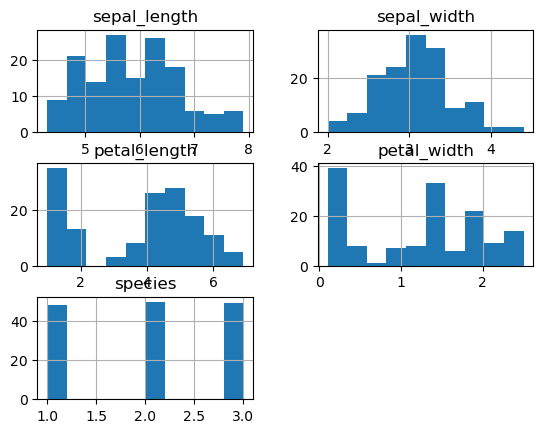

In [29]:
df.hist()

<Axes: xlabel='species', ylabel='sepal_width'>

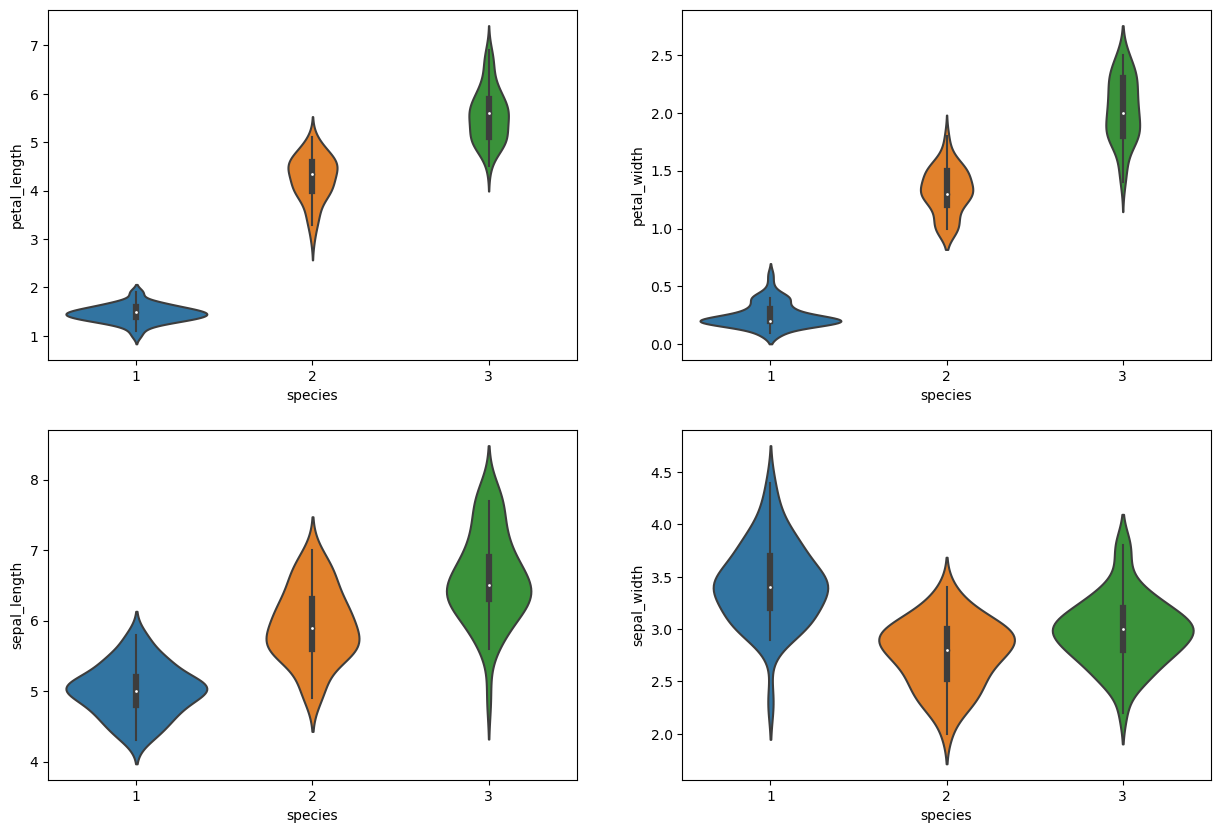

In [30]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='species',y='petal_length',data=df)
plt.subplot(2,2,2)
sns.violinplot(x='species',y='petal_width',data=df)
plt.subplot(2,2,3)
sns.violinplot(x='species',y='sepal_length',data=df)
plt.subplot(2,2,4)
sns.violinplot(x='species',y='sepal_width',data=df)

In [31]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width,species
count,147.000000,147.000000,147.000000,147.000000,147.000000
mean,5.856463,3.055782,3.780272,1.208844,2.006803
std,0.829100,0.437009,1.759111,0.757874,0.815069
min,4.300000,2.000000,1.000000,0.100000,1.000000
25%,5.100000,2.800000,1.600000,0.300000,1.000000
50%,5.800000,3.000000,4.400000,1.300000,2.000000
75%,6.400000,3.300000,5.100000,1.800000,3.000000
max,7.900000,4.400000,6.900000,2.500000,3.000000


In [32]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,1.000000,-0.109321,0.871305,0.817058,0.782904
sepal_width,-0.109321,1.000000,-0.421057,-0.356376,-0.418348
petal_length,0.871305,-0.421057,1.000000,0.961883,0.948339
petal_width,0.817058,-0.356376,0.961883,1.000000,0.955693
species,0.782904,-0.418348,0.948339,0.955693,1.000000


<Axes: >

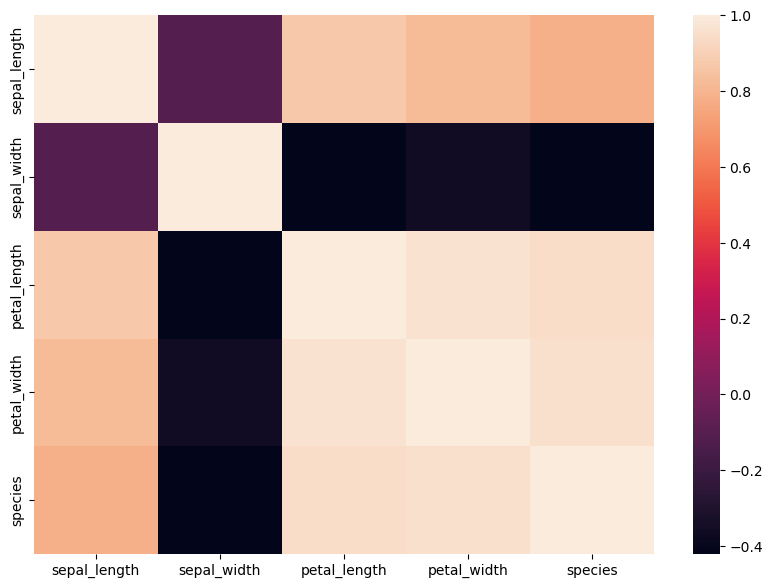

In [33]:
plt.figure(figsize=(10, 7))
sns.heatmap(df.corr())


<Axes: >

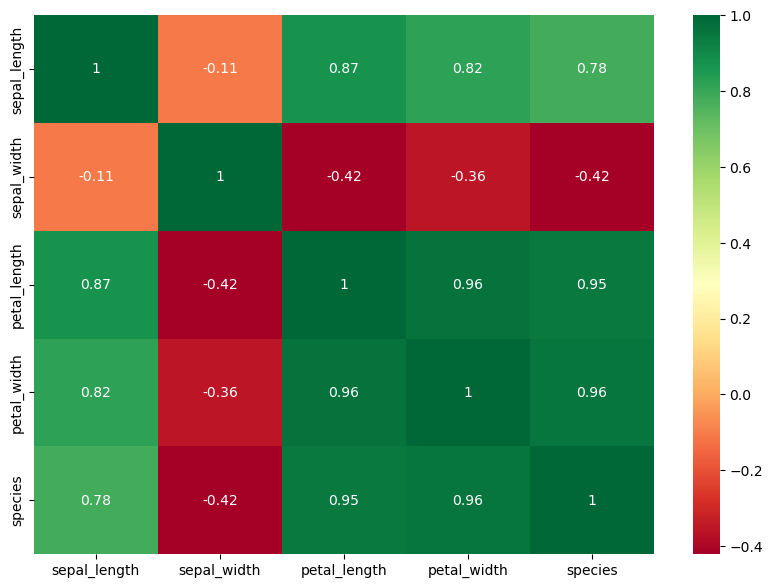

In [34]:
plt.figure(figsize=(10, 7))
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn')

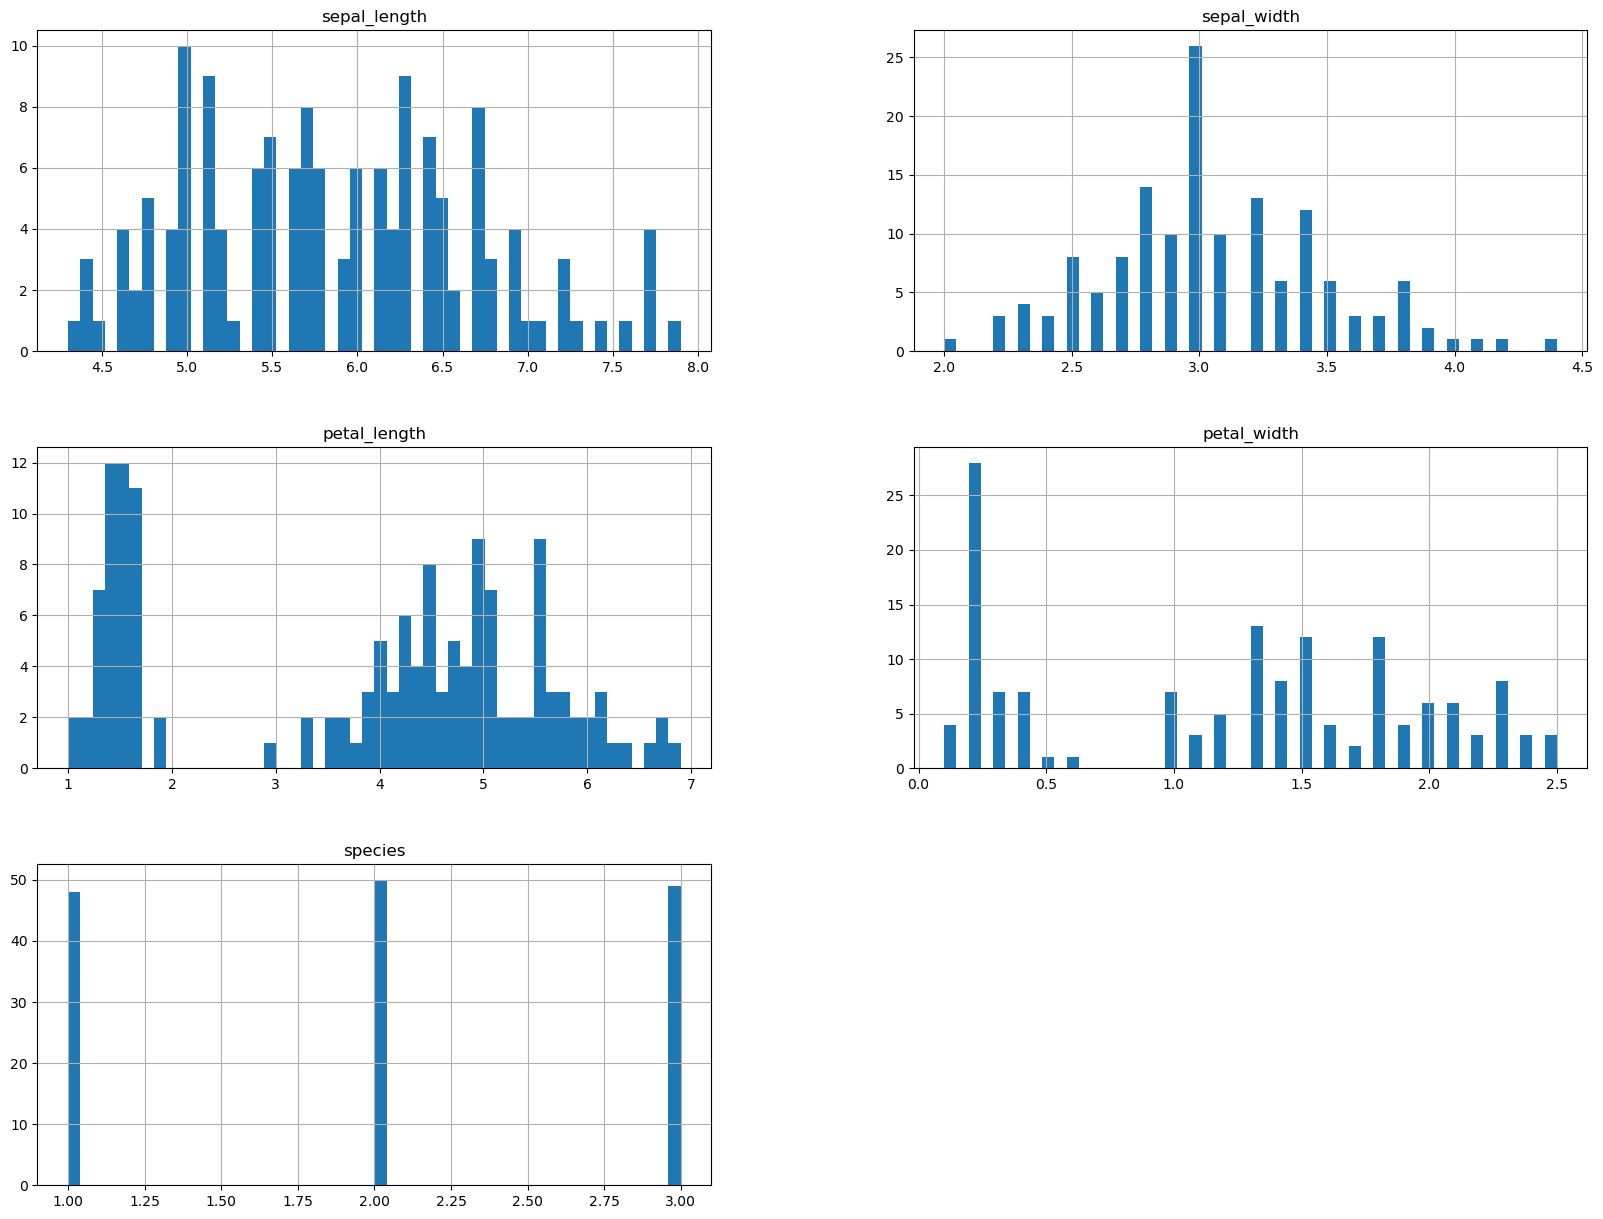

In [35]:
df.hist(bins=50,figsize=(20,15))
plt.show()

/home/vivek/.anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


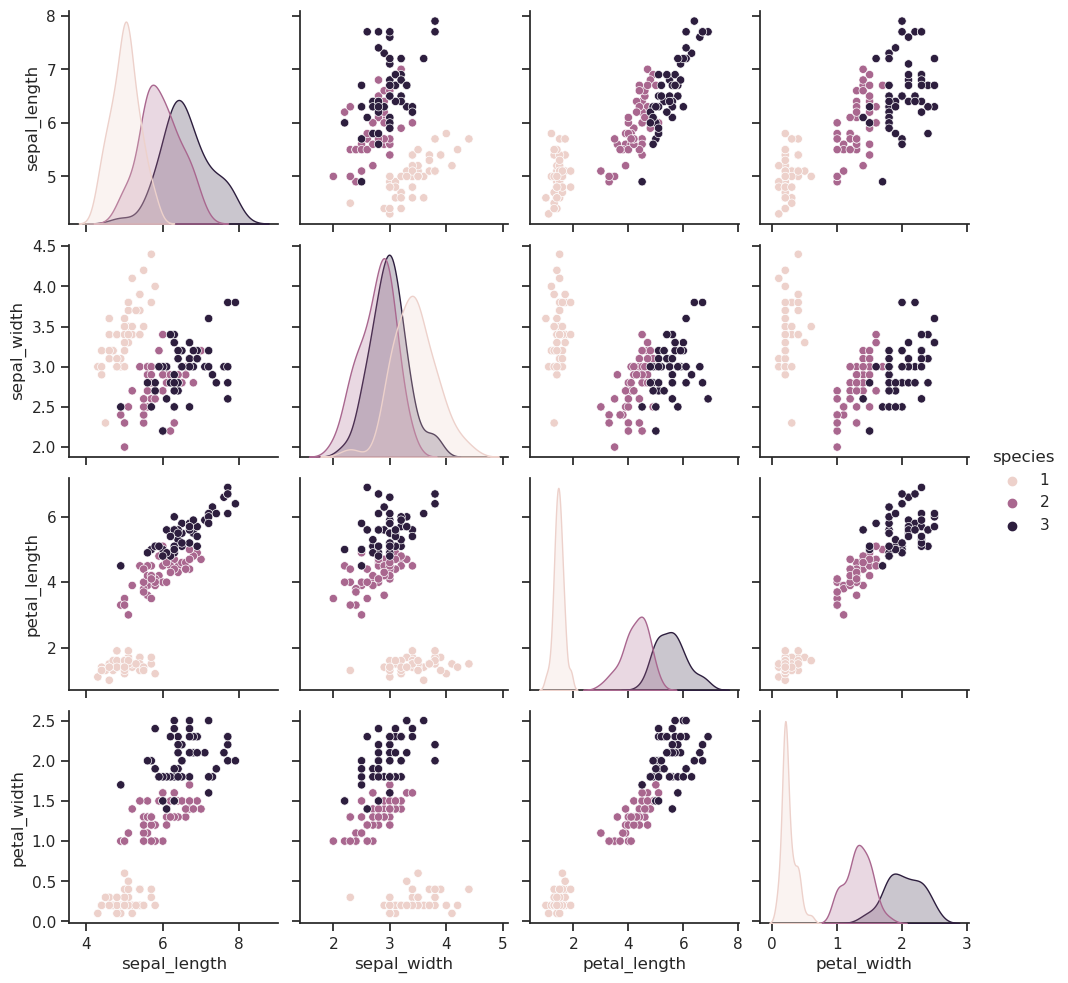

In [36]:
sns.set(style="ticks")
sns.pairplot(df,hue='species')
plt.show()

<Axes: xlabel='species', ylabel='Density'>

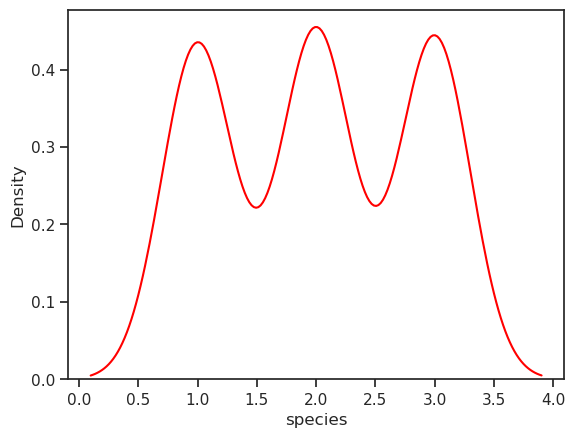

In [37]:
sns.kdeplot(df["species"],color='red')

In [38]:
print("Target variable frequency distribution:\n",df["species"].value_counts())

Target variable frequency distribution:
 species
2    50
3    49
1    48
Name: count, dtype: int64


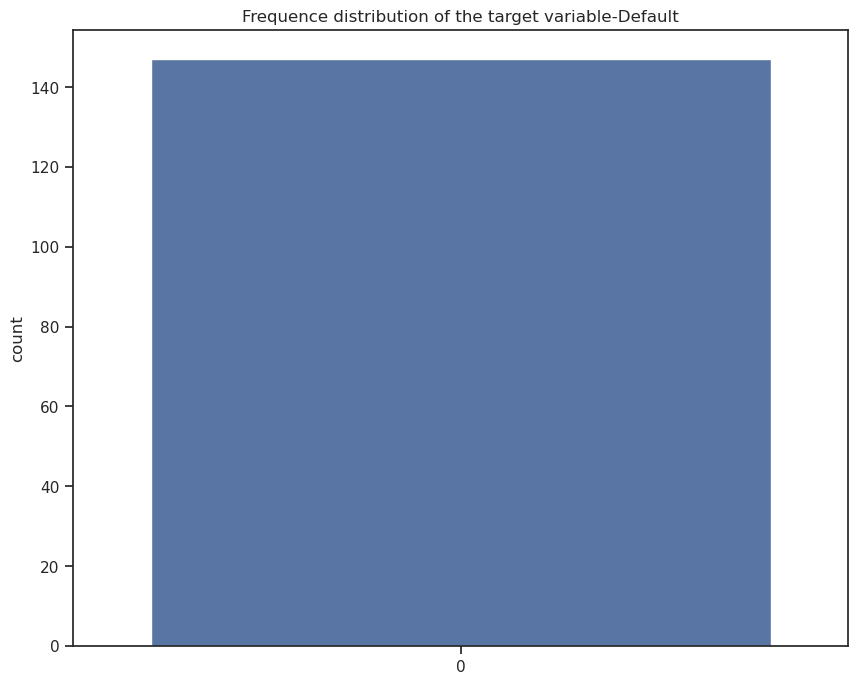

In [39]:
plt.figure(figsize=(10,8))
sns.countplot(df["species"])
plt.title("Frequence distribution of the target variable-Default")
plt.show()

In [40]:
x=df[["sepal_length","sepal_width","petal_length","petal_width"]]
y=df["species"]

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)

In [43]:
print("Size of training data : ", x_train.shape[0])
print("Size of test data : ", x_test.shape[0])

Size of training data :  117
Size of test data :  30


In [44]:
from sklearn.preprocessing import MinMaxScaler

In [45]:
min_max=MinMaxScaler()
min_max.fit(x_train)
train_transformed=min_max.transform(x_train)
transformed=min_max.transform(x_test)
transformed

array([[ 0.5       ,  0.41666667,  0.65517241,  0.70833333],
       [ 0.33333333,  0.125     ,  0.5       ,  0.5       ],
       [ 0.66666667,  0.45833333,  0.77586207,  0.95833333],
       [ 0.22222222,  0.75      ,  0.06896552,  0.08333333],
       [ 0.16666667,  0.20833333,  0.5862069 ,  0.66666667],
       [ 0.13888889,  0.41666667,  0.05172414,  0.        ],
       [ 0.47222222,  0.375     ,  0.5862069 ,  0.58333333],
       [ 0.30555556,  0.58333333,  0.06896552,  0.125     ],
       [ 0.47222222,  0.29166667,  0.68965517,  0.625     ],
       [ 0.16666667,  0.45833333,  0.06896552,  0.        ],
       [ 0.19444444,  0.58333333,  0.0862069 ,  0.125     ],
       [ 0.22222222,  0.20833333,  0.32758621,  0.41666667],
       [ 0.55555556,  0.20833333,  0.67241379,  0.75      ],
       [ 0.36111111,  0.20833333,  0.48275862,  0.41666667],
       [ 0.55555556,  0.58333333,  0.77586207,  0.95833333],
       [ 0.52777778,  0.08333333,  0.5862069 ,  0.58333333],
       [ 0.38888889,  0.

In [46]:
x_train["sepal_length_normalized"]=train_transformed[:,0]
x_train["sepal_width_normalized"]=train_transformed[:,1]
x_train["petal_length_normalized"]=train_transformed[:,2]
x_train["petal_width_normalized"]=train_transformed[:,3]
x_train.head()

,sepal_length,sepal_width,petal_length,petal_width,sepal_length_normalized,sepal_width_normalized,petal_length_normalized,petal_width_normalized
137,6.4,3.1,5.5,1.8,0.583333,0.458333,0.758621,0.708333
47,4.6,3.2,1.4,0.2,0.083333,0.500000,0.051724,0.041667
121,5.6,2.8,4.9,2.0,0.361111,0.333333,0.655172,0.791667
27,5.2,3.5,1.5,0.2,0.250000,0.625000,0.068966,0.041667
4,5.0,3.6,1.4,0.2,0.194444,0.666667,0.051724,0.041667


In [47]:
x_test["sepal_length_normalized"]=transformed[:,0]
x_test["sepal_width_normalized"]=transformed[:,1]
x_test["petal_length_normalized"]=transformed[:,2]
x_test["petal_width_normalized"]=transformed[:,3]
x_test.head()

,sepal_length,sepal_width,petal_length,petal_width,sepal_length_normalized,sepal_width_normalized,petal_length_normalized,petal_width_normalized
127,6.1,3.0,4.9,1.8,0.500000,0.416667,0.655172,0.708333
53,5.5,2.3,4.0,1.3,0.333333,0.125000,0.500000,0.500000
140,6.7,3.1,5.6,2.4,0.666667,0.458333,0.775862,0.958333
19,5.1,3.8,1.5,0.3,0.222222,0.750000,0.068966,0.083333
106,4.9,2.5,4.5,1.7,0.166667,0.208333,0.586207,0.666667


In [48]:
# Create an instance of MinMaxScaler
scaler = MinMaxScaler()
# Fit and transform the training data
x_train_normalized = scaler.fit_transform(x_train[["sepal_length","sepal_width","petal_length","petal_width"]])

# Transform the test data using the same scaler
x_test_normalized = scaler.transform(x_test[["sepal_length","sepal_width","petal_length","petal_width"]])

In [49]:
from sklearn.preprocessing import StandardScaler

In [50]:
st=StandardScaler()
df[cont_val]=st.fit_transform(df[cont_val])

In [51]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,-0.915509,1.019971,-1.357737,-1.3357,1
1,-1.157560,-0.128082,-1.357737,-1.3357,1
2,-1.399610,0.331139,-1.414778,-1.3357,1
3,-1.520635,0.101529,-1.300696,-1.3357,1
4,-1.036535,1.249582,-1.357737,-1.3357,1


# Apply Algorithm

# 1.KNN

In [52]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [53]:
knn =  KNeighborsClassifier(n_neighbors = 3, metric = "euclidean")
knn.fit(x_train,y_train)
pred1 = knn.predict(x_test)
test_accuracy = accuracy_score(y_test, pred1)
test_accuracy

0.9333333333333333

In [54]:
knn =  KNeighborsClassifier(n_neighbors = 3, metric = "euclidean")
knn.fit(x_train_normalized,y_train)
pred_normalized1 = knn.predict(x_test_normalized)
test_accuracy_normalized = accuracy_score(y_test, pred_normalized1)
test_accuracy

0.9333333333333333

In [55]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

        Class1  Class2  Class3
Class1      11       0       0
Class2       0       9       1
Class3       0       1       8


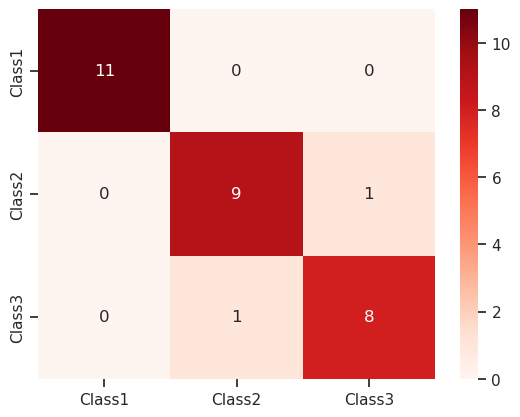

In [56]:
# Assuming cm is a 3x3 confusion matrix
cm = confusion_matrix(y_test, pred1)

# Specify the class labels based on your data
class_labels = ["Class1", "Class2", "Class3"]

df_cm = pd.DataFrame(cm, index=class_labels, columns=class_labels)

print(df_cm)

# If you want to visualize the confusion matrix, you can use seaborn
sns.heatmap(df_cm, annot=True, fmt="d", cmap="Reds")
plt.show()


In [57]:
print(classification_report(y_test,pred1))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        11
           2       0.90      0.90      0.90        10
           3       0.89      0.89      0.89         9

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



In [58]:
score=[]

for k in range(1,40):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    y_pred1=knn.predict(x_test)
    score.append(accuracy_score(y_test,y_pred1))

In [59]:
score

[0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9,
 0.9,
 0.9,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9,
 0.9333333333333333,
 0.9,
 0.9,
 0.8666666666666667,
 0.9333333333333333,
 0.8666666666666667,
 0.9,
 0.9,
 0.9,
 0.9,
 0.9,
 0.9,
 0.9,
 0.9,
 0.9,
 0.8666666666666667,
 0.8666666666666667,
 0.8666666666666667,
 0.9,
 0.8666666666666667,
 0.8666666666666667,
 0.9,
 0.9,
 0.9,
 0.9]

# 2. Logistic Regression

In [60]:
from sklearn.linear_model import LogisticRegression

In [61]:
log =  LogisticRegression()
log.fit(x_train,y_train)
pred2 = log.predict(x_test)
test_accuracy = accuracy_score(y_test, pred2)
test_accuracy

/home/vivek/.anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9333333333333333

In [62]:
log.fit(x_train_normalized,y_train)
pred_normalized2 = log.predict(x_test_normalized)
test_accuracy_normalized = accuracy_score(y_test, pred_normalized2)
test_accuracy

0.9333333333333333

        Class1  Class2  Class3
Class1      11       0       0
Class2       0       9       1
Class3       0       1       8


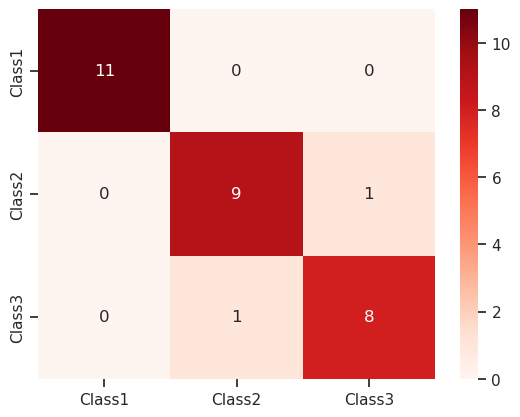

In [63]:
cm = confusion_matrix(y_test, pred2)

# Specify the class labels based on your data
class_labels = ["Class1", "Class2", "Class3"]

df_cm = pd.DataFrame(cm, index=class_labels, columns=class_labels)

print(df_cm)

# If you want to visualize the confusion matrix, you can use seaborn
sns.heatmap(df_cm, annot=True, fmt="d", cmap="Reds")
plt.show()


In [64]:
print(classification_report(y_test,pred2))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        11
           2       0.90      0.90      0.90        10
           3       0.89      0.89      0.89         9

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



In [65]:
score=[]

for l in range(1,40):
    log=LogisticRegression()
    log.fit(x_train,y_train)
    pred2=log.predict(x_test)
    score.append(accuracy_score(y_test,pred2))

/home/vivek/.anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/vivek/.anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

In [66]:
score

[0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333]

# 3. SVM

In [67]:
from sklearn.svm import SVC

In [68]:
svm=SVC()
svm.fit(x_train,y_train)
pred3=svm.predict(x_test)
test_accuracy = accuracy_score(y_test, pred3)
test_accuracy

0.9

In [69]:
svm.fit(x_train_normalized,y_train)
pred_normalized3 = svm.predict(x_test_normalized)
test_accuracy_normalized = accuracy_score(y_test, pred_normalized3)
test_accuracy

0.9

        Class1  Class2  Class3
Class1      11       0       0
Class2       0       9       1
Class3       0       2       7


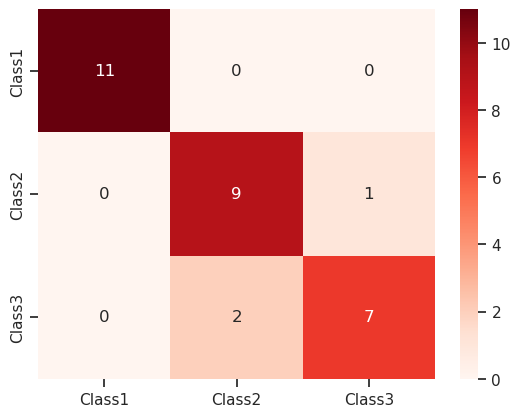

In [70]:
cm = confusion_matrix(y_test, pred3)

# Specify the class labels based on your data
class_labels = ["Class1", "Class2", "Class3"]

df_cm = pd.DataFrame(cm, index=class_labels, columns=class_labels)

print(df_cm)

# If you want to visualize the confusion matrix, you can use seaborn
sns.heatmap(df_cm, annot=True, fmt="d", cmap="Reds")
plt.show()


In [71]:
print(classification_report(y_test,pred3))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        11
           2       0.82      0.90      0.86        10
           3       0.88      0.78      0.82         9

    accuracy                           0.90        30
   macro avg       0.90      0.89      0.89        30
weighted avg       0.90      0.90      0.90        30



In [72]:
score=[]

for s in range(1,40):
    svm=SVC()
    svm.fit(x_train,y_train)
    pred3=knn.predict(x_test)
    score.append(accuracy_score(y_test,pred3))

In [73]:
score

[0.9,
 0.9,
 0.9,
 0.9,
 0.9,
 0.9,
 0.9,
 0.9,
 0.9,
 0.9,
 0.9,
 0.9,
 0.9,
 0.9,
 0.9,
 0.9,
 0.9,
 0.9,
 0.9,
 0.9,
 0.9,
 0.9,
 0.9,
 0.9,
 0.9,
 0.9,
 0.9,
 0.9,
 0.9,
 0.9,
 0.9,
 0.9,
 0.9,
 0.9,
 0.9,
 0.9,
 0.9,
 0.9,
 0.9]

# 4. DECISION TREE 

In [74]:
from sklearn.tree import DecisionTreeClassifier

In [75]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
pred4=dt.predict(x_test)
accuracy_score(y_test,pred4)

0.9666666666666667

In [76]:
dt.fit(x_train_normalized,y_train)
pred_normalized4 = dt.predict(x_test_normalized)
test_accuracy_normalized = accuracy_score(y_test, pred_normalized4)
test_accuracy

0.9

        Class1  Class2  Class3
Class1      11       0       0
Class2       0       9       1
Class3       0       0       9


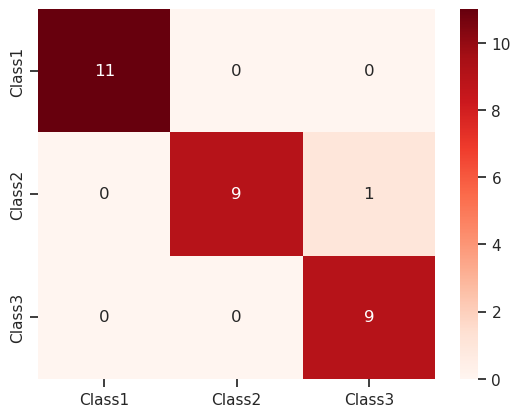

In [77]:
cm = confusion_matrix(y_test, pred4)

# Specify the class labels based on your data
class_labels = ["Class1", "Class2", "Class3"]

df_cm = pd.DataFrame(cm, index=class_labels, columns=class_labels)

print(df_cm)

# If you want to visualize the confusion matrix, you can use seaborn
sns.heatmap(df_cm, annot=True, fmt="d", cmap="Reds")
plt.show()

In [78]:
print(classification_report(y_test,pred3))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        11
           2       0.77      1.00      0.87        10
           3       1.00      0.67      0.80         9

    accuracy                           0.90        30
   macro avg       0.92      0.89      0.89        30
weighted avg       0.92      0.90      0.90        30



In [79]:
score=[]

for d in range(1,40):
    dt=DecisionTreeClassifier()
    dt.fit(x_train,y_train)
    pred4=dt.predict(x_test)
    score.append(accuracy_score(y_test,pred4))

In [80]:
score

[0.9666666666666667,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9333333333333333,
 0.9666666666666667,
 0.9333333333333333,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9333333333333333,
 0.9333333333333333,
 0.9666666666666667,
 0.9666666666666667,
 0.9333333333333333,
 0.9333333333333333,
 0.9666666666666667,
 0.9333333333333333,
 0.9666666666666667,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9666666666666667,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9666666666666667,
 0.9333333333333333,
 0.9666666666666667,
 0.9666666666666667,
 0.9333333333333333,
 0.9666666666666667,
 0.9666666666666667]

# 5. Random Forest

In [81]:
from sklearn.ensemble import RandomForestClassifier

In [82]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
pred5=rf.predict(x_test)
accuracy_score(y_test,pred5)

0.9333333333333333

In [83]:
rf.fit(x_train_normalized,y_train)
pred_normalized5 = rf.predict(x_test_normalized)
test_accuracy_normalized = accuracy_score(y_test, pred_normalized5)
test_accuracy

0.9

        Class1  Class2  Class3
Class1      11       0       0
Class2       0       9       1
Class3       0       1       8


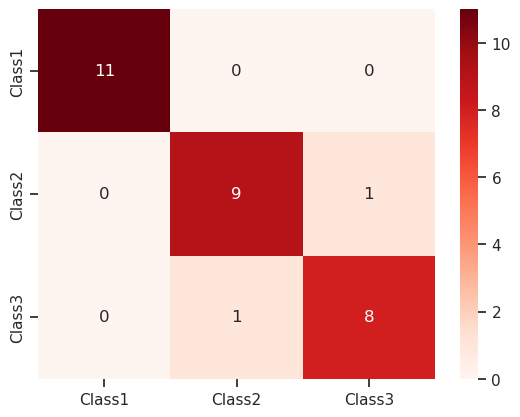

In [84]:
cm = confusion_matrix(y_test, pred5)

# Specify the class labels based on your data
class_labels = ["Class1", "Class2", "Class3"]

df_cm = pd.DataFrame(cm, index=class_labels, columns=class_labels)

print(df_cm)

# If you want to visualize the confusion matrix, you can use seaborn
sns.heatmap(df_cm, annot=True, fmt="d", cmap="Reds")
plt.show()

In [85]:
print(classification_report(y_test,pred5))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        11
           2       0.90      0.90      0.90        10
           3       0.89      0.89      0.89         9

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



In [86]:
score=[]

for d in range(1,40):
    rf=RandomForestClassifier()
    rf.fit(x_train,y_train)
    pred5=rf.predict(x_test)
    score.append(accuracy_score(y_test,pred5))

In [87]:
score

[0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333]

# 6. GRADIENT BOOSTING CLASSIFIER

In [88]:
from sklearn.ensemble import GradientBoostingClassifier

In [89]:
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)
pred6=gbc.predict(x_test)
accuracy_score(y_test,pred6)

0.9333333333333333

In [90]:
gbc.fit(x_train_normalized,y_train)
pred_normalized6 = gbc.predict(x_test_normalized)
test_accuracy_normalized = accuracy_score(y_test, pred_normalized6)
test_accuracy

0.9

        Class1  Class2  Class3
Class1      11       0       0
Class2       0       9       1
Class3       0       1       8


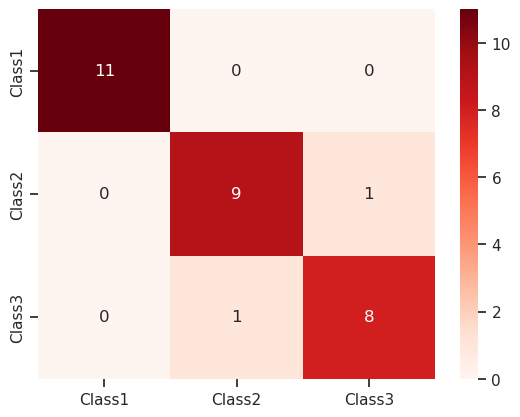

In [91]:
cm = confusion_matrix(y_test, pred6)

# Specify the class labels based on your data
class_labels = ["Class1", "Class2", "Class3"]

df_cm = pd.DataFrame(cm, index=class_labels, columns=class_labels)

print(df_cm)

# If you want to visualize the confusion matrix, you can use seaborn
sns.heatmap(df_cm, annot=True, fmt="d", cmap="Reds")
plt.show()

In [92]:
print(classification_report(y_test,pred6))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        11
           2       0.90      0.90      0.90        10
           3       0.89      0.89      0.89         9

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



In [93]:
score=[]

for g in range(1,40):
    gbc=GradientBoostingClassifier()
    gbc.fit(x_train,y_train)
    pred6=gbc.predict(x_test)
    score.append(accuracy_score(y_test,pred6))
score

[0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333]

# 7. NAIVE BAYES CLASSIFIER ALGORITHM

In [94]:
from sklearn.naive_bayes import GaussianNB

In [95]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
pred7=gnb.predict(x_test)
accuracy_score(y_test,pred7)

0.9666666666666667

        Class1  Class2  Class3
Class1      11       0       0
Class2       0      10       0
Class3       0       1       8


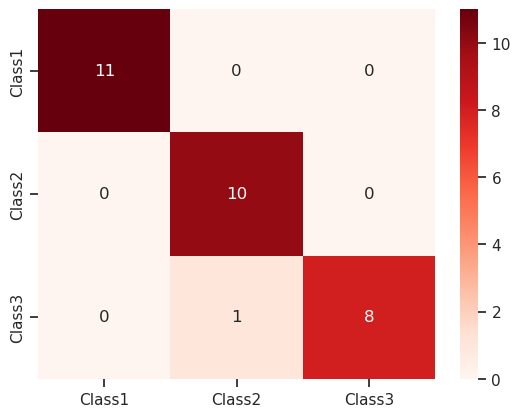

In [96]:
cm = confusion_matrix(y_test, pred7)

# Specify the class labels based on your data
class_labels = ["Class1", "Class2", "Class3"]

df_cm = pd.DataFrame(cm, index=class_labels, columns=class_labels)

print(df_cm)

# If you want to visualize the confusion matrix, you can use seaborn
sns.heatmap(df_cm, annot=True, fmt="d", cmap="Reds")
plt.show()

In [97]:
print(classification_report(y_test,pred7))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        11
           2       0.91      1.00      0.95        10
           3       1.00      0.89      0.94         9

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



In [98]:
score=[]

for n in range(1,40):
    gnb=GaussianNB()
    gnb.fit(x_train,y_train)
    pred7=gnb.predict(x_test)
    score.append(accuracy_score(y_test,pred7))
score

[0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667]

In [99]:
from sklearn.neural_network import MLPClassifier

In [100]:
nn= MLPClassifier()
nn.fit(x_train, y_train)
pred8 = nn.predict(x_test)
accuracy_score(y_test,pred8)


/home/vivek/.anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.9666666666666667

        Class1  Class2  Class3
Class1      11       0       0
Class2       0       9       1
Class3       0       0       9


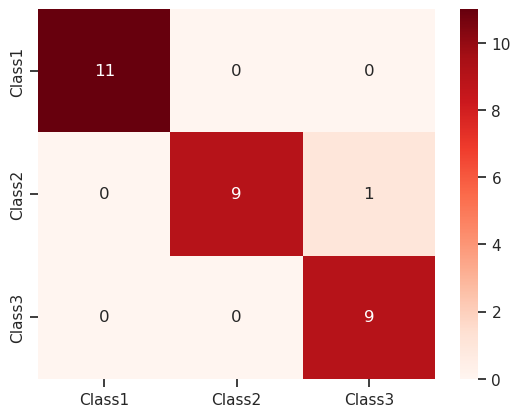

In [101]:
cm = confusion_matrix(y_test, pred8)

# Specify the class labels based on your data
class_labels = ["Class1", "Class2", "Class3"]

df_cm = pd.DataFrame(cm, index=class_labels, columns=class_labels)

print(df_cm)

# If you want to visualize the confusion matrix, you can use seaborn
sns.heatmap(df_cm, annot=True, fmt="d", cmap="Reds")
plt.show()

In [102]:
print(classification_report(y_test,pred8))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        11
           2       1.00      0.90      0.95        10
           3       0.90      1.00      0.95         9

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



In [103]:
score=[]

for N in range(1,40):
    nn=MLPClassifier()
    nn.fit(x_train,y_train)
    pred8=nn.predict(x_test)
    score.append(accuracy_score(y_test,pred8))

/home/vivek/.anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/vivek/.anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/vivek/.anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/vivek/.anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/vivek/.anaconda3/lib/python3.1

In [104]:
score

[0.9666666666666667,
 0.9333333333333333,
 0.9666666666666667,
 0.9666666666666667,
 0.9333333333333333,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9333333333333333,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9666666666666667,
 0.9333333333333333,
 0.9333333333333333,
 0.9666666666666667,
 0.9333333333333333,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9333333333333333,
 0.9666666666666667,
 0.9666666666666667,
 0.9333333333333333,
 0.9333333333333333,
 0.9333333333333333,
 0.9666666666666667,
 0.9333333333333333,
 0.9333333333333333,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667]

In [105]:
final_df=pd.DataFrame({'Models':['KNN','LR','SVM','DT','RF','GB','NB','NN'],
                  'ACC':[accuracy_score(y_test,pred1),
                         accuracy_score(y_test,pred2),
                         accuracy_score(y_test,pred3),
                         accuracy_score(y_test,pred4),
                         accuracy_score(y_test,pred5),
                         accuracy_score(y_test,pred6),
                         accuracy_score(y_test,pred7),
                         accuracy_score(y_test,pred8)]})

In [106]:
final_df

,Models,ACC
0,KNN,0.933333
1,LR,0.933333
2,SVM,0.900000
3,DT,0.966667
4,RF,0.933333
5,GB,0.933333
6,NB,0.966667
7,NN,0.966667


In [107]:
import seaborn as sns
import matplotlib.pyplot as plt

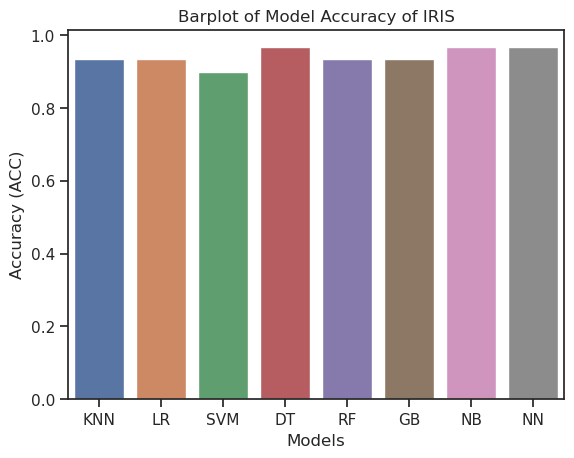

In [108]:
sns.barplot(x=final_df['Models'], y=final_df['ACC'])

# Add labels and title
plt.xlabel('Models')
plt.ylabel('Accuracy (ACC)')
plt.title('Barplot of Model Accuracy of IRIS')

plt.show()

In [109]:
x=df.drop('species',axis=1)
y=df['species']

In [110]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [111]:
from sklearn.naive_bayes import GaussianNB

In [112]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB()

In [113]:
import joblib

In [114]:
joblib.dump(gnb,'model_joblib_IRIS_prediction')

['model_joblib_IRIS_prediction']

In [115]:
model=joblib.load('model_joblib_IRIS_prediction')

In [116]:
data = {
    'sepal_length':[5.1], 
    'sepal_width':[3.5], 
    'petal_length':[1.4], 
    'petal_width':[0.2],
}

new_df = pd.DataFrame(data, index=[0])

In [117]:
prediction=model.predict(new_df)

In [118]:
print(prediction)

[3]


# GUI

In [119]:
import tkinter as tk
from tkinter import Label, Entry, Button, messagebox
import joblib
import numpy as np

In [120]:
# Create the GUI window
master = tk.Tk()
master.title("Iris Prediction System")
def show_entry_fields():
    try:
        sepal_length = float(e1.get())
        sepal_width = float(e2.get())
        petal_length = float(e3.get())
        petal_width = float(e4.get())

        model = joblib.load('model_joblib_IRIS_prediction')
        result = model.predict([[sepal_length, sepal_width, petal_length, petal_width]])

        species_mapping = {
            1: "Iris-setosa",
            2:"Iris-versicolor",
            3:"Iris-virginica"
        }

        predicted_species = species_mapping.get(result[0], "Unknown")

        prediction_text.set(f"Predicted Species: {predicted_species}")
    except ValueError:
        messagebox.showerror("Error", "Invalid input. Please enter numeric values.")

# Create input fields and labels
Label(master, text="Iris Flower Prediction System", bg="black", fg="yellow").grid(row=0, columnspan=4)

Label(master, text="Sepal Length").grid(row=1,column=0)
Label(master, text="Sepal Width").grid(row=2,column=0)
Label(master, text="Petal Length").grid(row=3,column=0)
Label(master, text="Petal Width").grid(row=4,column=0)

# Create input fields
e1 = Entry(master)
e1.grid(row=1, column=1)
e2 = Entry(master)
e2.grid(row=2, column=1)
e3 = Entry(master)
e3.grid(row=3, column=1)
e4 = Entry(master)
e4.grid(row=4, column=1)

# Create the prediction button
Button(master, text='Predict', command=show_entry_fields).grid(row=5, columnspan=4)

# Create a variable to display prediction result
prediction_text = tk.StringVar()
Label(master, textvariable=prediction_text).grid(row=6, columnspan=4)

# Start the GUI main loop
master.mainloop()